In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
coin = cv2.imread('data/coin.jpg')
# cv2.imshow('coin',coin)

In [3]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

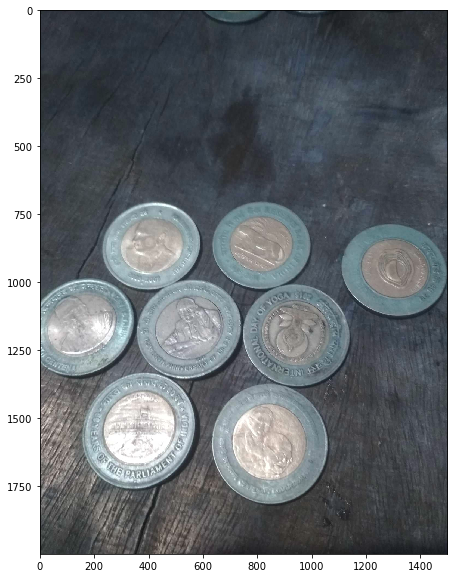

In [4]:
display(coin)

In [5]:
# Apply Blure
img = cv2.medianBlur(coin,27)

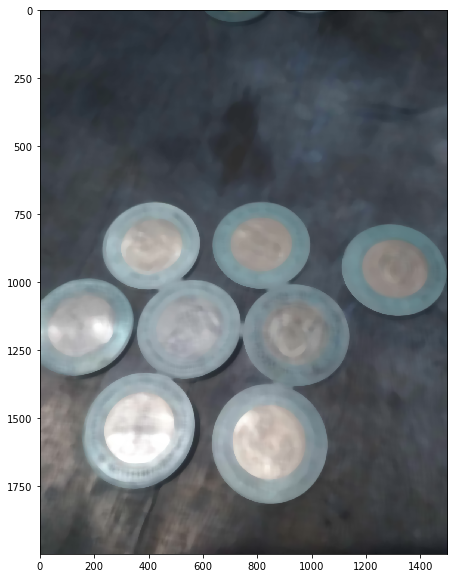

In [6]:
display(img)

In [7]:
#gray 

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

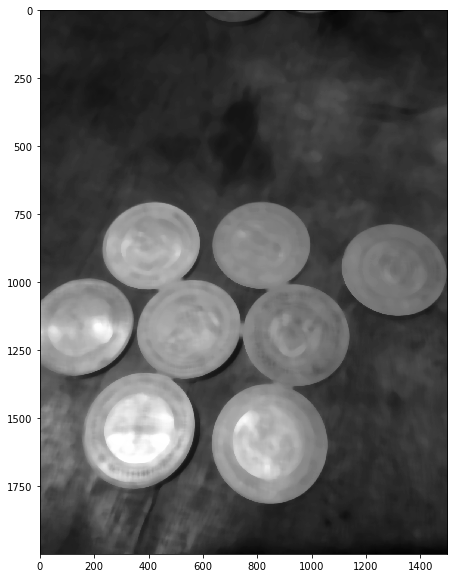

In [8]:
display(gray)

In [9]:
# Next step is Threshold

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

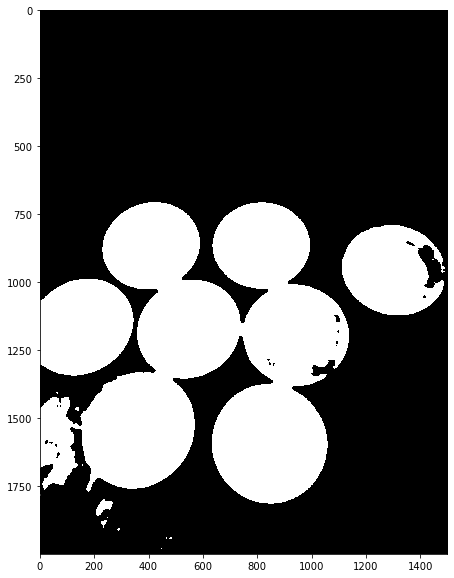

In [10]:
display(thresh)

In [11]:
# Now Remove noise 
#dilation
#opening
kernel = np.ones((3,3), np.uint8)

In [12]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [13]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

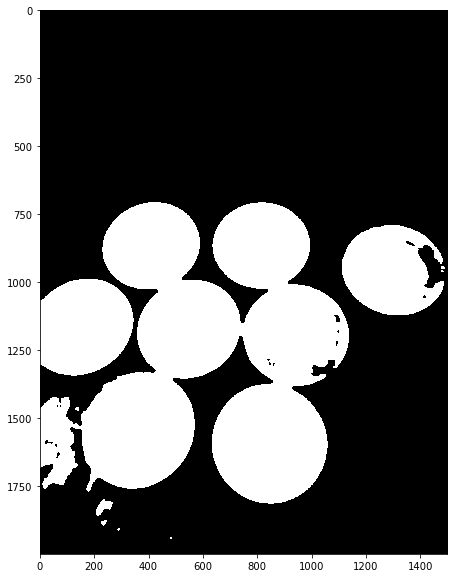

In [14]:
display(opening)

In [15]:
# sure Background  dilate()

sure_bg = cv2.dilate(opening,kernel,iterations = 2)

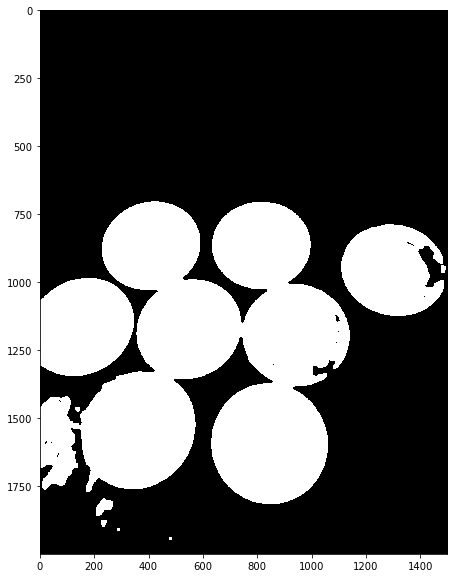

In [16]:
display(sure_bg)

In [17]:
#Distance Transform
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# 5 is mask value

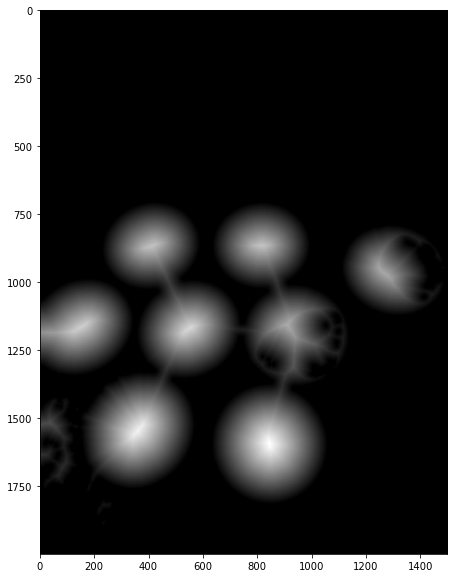

In [18]:
display(dist_transform)

In [19]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(),255,0)

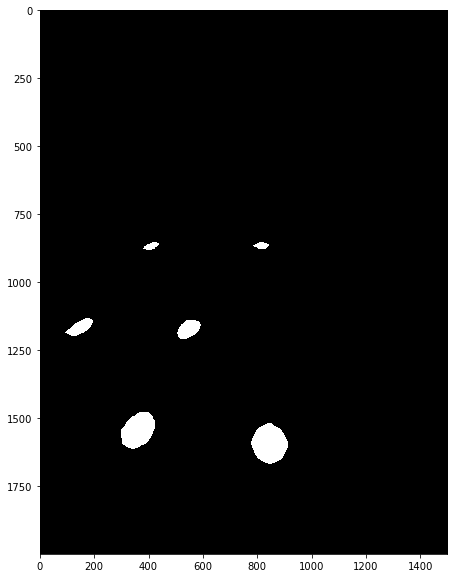

In [20]:
display(sure_fg)

In [21]:
# lets find the Unknown Region


sure_fg = np.uint8(sure_fg)

In [22]:
unknown = cv2.subtract(sure_bg,sure_fg)

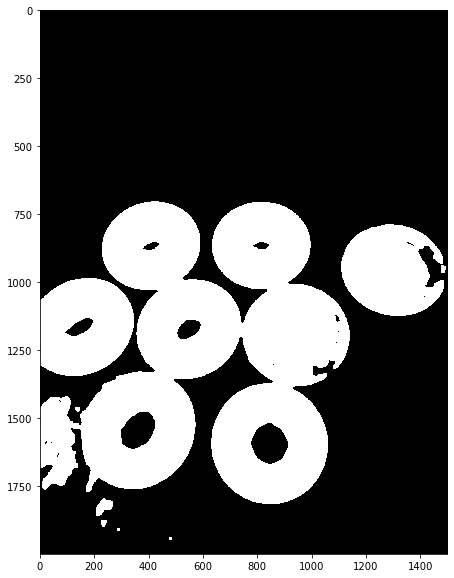

In [23]:
display(unknown)

In [24]:
ret, marker = cv2.connectedComponents(sure_fg)

In [25]:
marker = marker + 1


In [26]:
marker[unknown == 255] = 0 

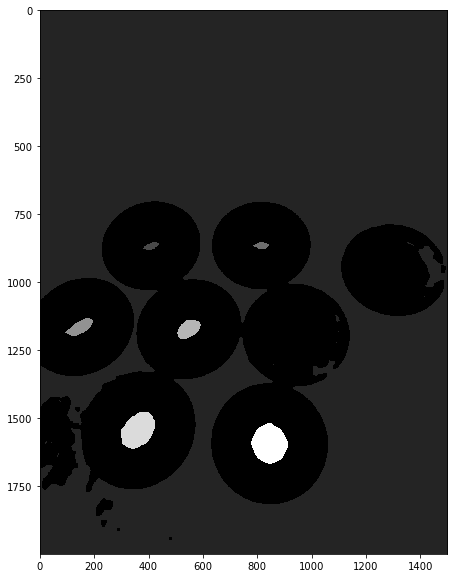

In [27]:
display(marker)

In [28]:
marker = cv2.watershed(img,marker)

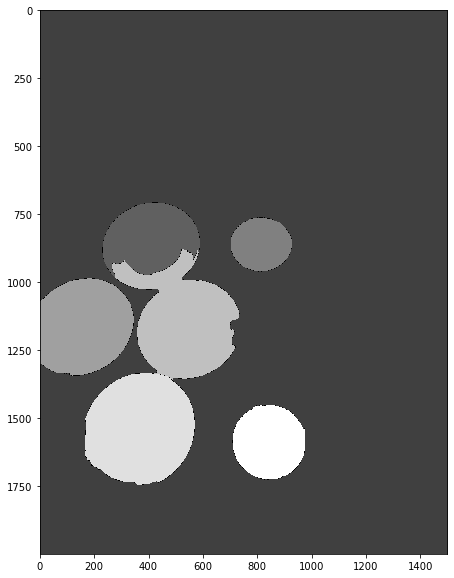

In [29]:
display(marker)

In [30]:
contours,hierarchy = cv2.findContours(marker.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(coin,contours,i,(0,0,255),10)

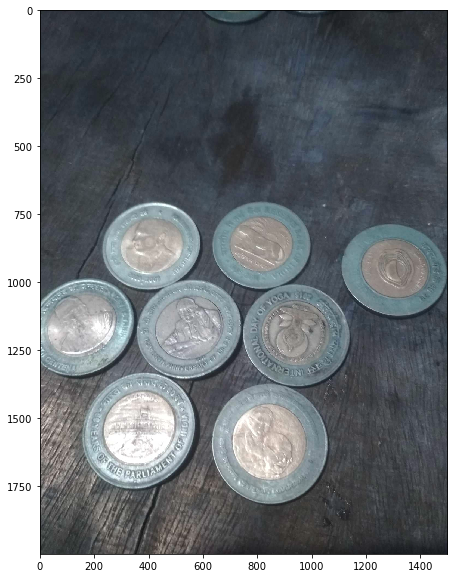

In [31]:
display(coin)